In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [5]:
matplotlib.rcParams["font.size"] = 15

In [26]:
def plot_history(hist_file, loss_tick=None, cut_eps=[0, -1], major_xticks=None, linewidth=2):
    
    hist = None
    with open(hist_file, 'rb') as f:
        hist = pickle.load(f)
        hist = pd.DataFrame(hist, index=np.arange(1, len(hist['loss']) + 1))
    _, ax = plt.subplots(1, 2, figsize=(18,5))
    
    hist = hist.iloc[cut_eps[0]:cut_eps[1]]
    
    line, = ax[0].plot(hist.index, hist['loss'], c="c", linewidth=linewidth)
    line.set_label('Loss')
    line, = ax[0].plot(hist.index, hist['val_loss'], c="c", linestyle="--", linewidth=linewidth)
    line.set_label('Validation loss')
    
    names = {'iou' : 'IoU', 'dice' : 'Dice'}
    for c, metr in zip('rb', ['iou', 'dice']):
        line, = ax[1].plot(hist.index, hist[metr], c=c)
        line.set_label(names[metr])
        line, = ax[1].plot(hist.index, hist['val_'+metr], c=c, linestyle="--")
        line.set_label('Validation ' + names[metr])
    
    if major_xticks is None:
        major_xticks = hist.index[4::5]
    
    for i in range(2):
        ax[i].legend()
        ax[i].set_xticks(hist.index, minor=True)
        ax[i].set_xticks(major_xticks)
        ax[i].grid(True, axis='both', which='major')
        ax[i].grid(True, axis='both', which='minor', alpha=0.2)
        ax[i].set_xlabel('Epochs')
    if not (loss_tick is None):
        ax[0].set_yticks(loss_tick[::5])
        ax[0].set_yticks(loss_tick, minor=True)
    ax[0].set_ylabel('Binary crossentropy')
    ax[1].set_ylabel('IoU / Dice')

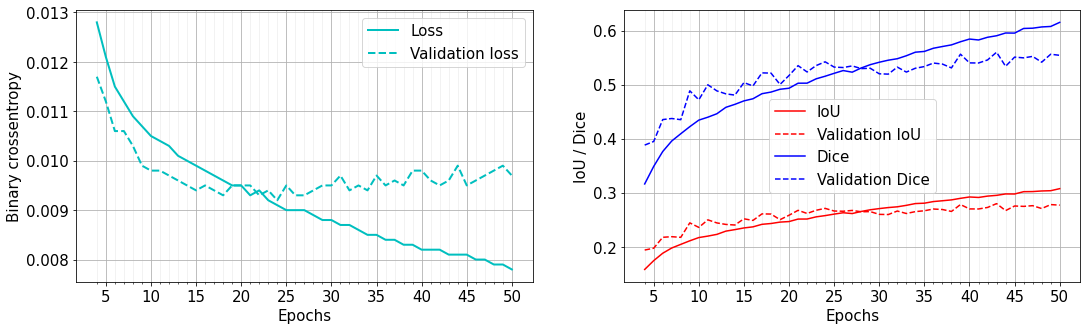

In [27]:
plot_history('../Data/other/all_found4.ep1-50.history', cut_eps=[3, 50], 
             major_xticks=np.arange(5, 51, 5))